### 1) Reading and exploring the dataset.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
from pandas import read_csv

In [5]:
amazon = read_csv(("/content/drive/My Drive/ratings_Electronics.csv"), names= ['userID','productID','ratings','timestamp'])
amazon.head()

,userID,productID,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
print("The dataset has about {} rows".format(amazon.shape[0]))
print("The dataset has about {} columns".format(amazon.shape[1]))

The dataset has about 7824482 rows
The dataset has about 4 columns


In [7]:
amazon.dtypes

userID        object
productID     object
ratings      float64
timestamp      int64
dtype: object

- userID seems to be ok as an object but since the product ID seems to have only numbers(atleast at the start) it shouldn't be an object. Let's check for irrelevancies.

In [8]:
amazon['productID'].unique()

array(['0132793040', '0321732944', '0439886341', ..., 'BT008T2BGK',
       'BT008UKTMW', 'BT008V9J9U'], dtype=object)

So it seems that we have strings or alphabets. Hence, the productID seems to be fine.

In [9]:
amazon.isnull().sum()

userID       0
productID    0
ratings      0
timestamp    0
dtype: int64

This  confirms  the absence of any null values in the dataset.

In [10]:
amazon.eq("?").any()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


userID       False
productID    False
ratings      False
timestamp    False
dtype: bool

In [11]:
amazon.describe()

,ratings,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


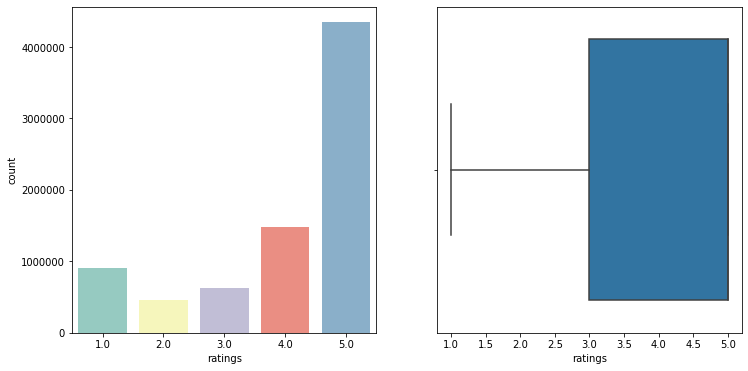

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2, figsize=(12,6))
sns.countplot(amazon['ratings'],palette='Set3',ax = ax[0])
sns.boxplot(data = amazon,x='ratings',ax = ax[1])
fig.show()

As per the above plots, it's quite clear that a rating of 5 has been given the maximum number of times. But, there doesn't seem to be an outlier. The data is mostly concentrated between a rating of 3-5, or in other words, the products that are available are either the products with a higher rating, or only the products which have higher rating are being available. So data for low ratings should have been available to get an exact view of the products range.

## 2) Take a subset of the data to make it less sparse/denser(Keeping the users who have given a rating for a minimum of 50 products).

In [0]:
subs = amazon['userID'].value_counts()
amazon = amazon[amazon.userID.isin(subs[subs>=50].index)]

In [14]:
amazon.shape

(125871, 4)

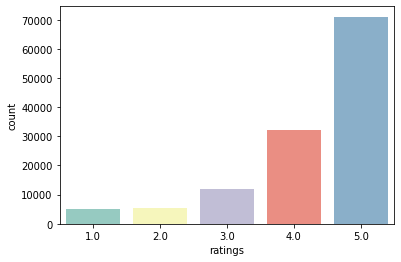

In [15]:
sns.countplot(amazon['ratings'],palette='Set3')

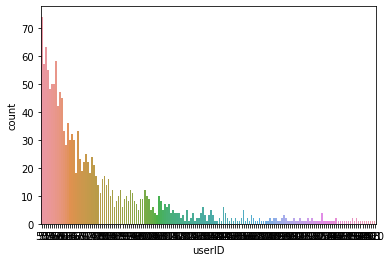

In [16]:
sns.countplot(amazon['userID'].value_counts())

## 3) Splitting the data randomly into train & test with a split ratio of 70:30.

In [18]:
!pip install scikit-surprise

     |████████████████████████████████| 6.5MB 22.6MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678238 sha256=d4849bb93a057bd422a8dec204f283179e0e9dbc0e3bde74b3273887b8bcfbb3
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(amazon[['userID','productID', 'ratings']],reader)
train,test = train_test_split(data, test_size = 0.15, random_state = 456788)

## 4) Building popularity recommendation system model.

In [20]:
amazon.groupby('productID')['ratings'].mean().sort_values(ascending = False)

productID
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
             ... 
B000VJ0YQ0    1.0
B000MVEBOS    1.0
B000C0OF54    1.0
B005YXXT7Y    1.0
B0080REM4A    1.0
Name: ratings, Length: 48190, dtype: float64

In [0]:
Product_Mean_Count = pd.DataFrame(amazon.groupby('productID')['ratings'].mean().sort_values(ascending = False))

In [25]:
Product_Mean_Count

,ratings
productID,
B00LKG1MC8,5.0
B002QUZM3M,5.0
B002QWNZHU,5.0
B002QXZPFE,5.0
B002R0DWNS,5.0
...,...
B000VJ0YQ0,1.0
B000MVEBOS,1.0
B000C0OF54,1.0


In [26]:
Product_Mean_Count['ratings_count'] = pd.DataFrame(amazon.groupby('productID')['ratings'].count().sort_values(ascending = False))
Product_Mean_Count.shape

(48190, 2)

In [27]:
print("The following are the top 10 popular electronic items: ")
Product_Mean_Count.sort_values(by = 'ratings_count', ascending = False).head(10)

The following are the top 10 popular electronic items: 


,ratings,ratings_count
productID,,
B0088CJT4U,4.218447,206
B003ES5ZUU,4.864130,184
B000N99BBC,4.772455,167
B007WTAJTO,4.701220,164
B00829TIEK,4.436242,149
B008DWCRQW,4.094891,137
B00829THK0,4.416058,137
B002R5AM7C,4.125000,128
B004CLYEDC,4.669492,118


## 5) Building a collaborative filtering model. 

In [0]:
from surprise import KNNWithMeans
from surprise import SVD
from surprise import accuracy
import collections

In [0]:
# User based collaborative filtering model.

kwm = KNNWithMeans(k = 50)
svd = SVD()

In [30]:
# Fitting the model.

kwm.fit(train)
svd.fit(train)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [0]:
# Predicting for the KWithMeans model.

test_pred = kwm.test(test)

# Predicting for the SVD model

test_pred1 = svd.test(test)

## 6) Evaluating the collaborative filtering model(made with 2 different algorithms KWithMeans & SVD).

In [32]:
print("The accuracy of the model built using KWithMeans is : ")
accuracy.rmse(test_pred)
print("The accuracy of the model built using SVD is : ")
accuracy.rmse(test_pred1)

The accuracy of the model built using KWithMeans is : 
RMSE: 1.0541
The accuracy of the model built using SVD is : 
RMSE: 0.9779


0.9779243863786141

In [0]:
def get_top_n(predictions, n):                
    # First map the predictions to each user.
    
    top_n = collections.defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sorting the predictions for each user and retrieving the highest k ones.
    
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

In [0]:
#Getting top n using K with means model

top_n = get_top_n(test_pred, n = 5)

In [0]:
#Getting top n using SVD model

top_n1 = get_top_n(test_pred1,n = 5)

In [37]:
top_n

defaultdict(list,
            {'A1MZL91Z44RN06': [('B004C4SHQY', 5),
              ('B00766BF1E', 5),
              ('B002V8C3W2', 5),
              ('B00GMGDH38', 4.99564492626664),
              ('B0074FGLUM', 4.9908995764872195)],
             'A25QJBK33C4O0R': [('B009RPDP2Y', 4.665161892901619),
              ('B00BGA9WK2', 4.498816540062146),
              ('B002QC17VG', 4.494313093351911),
              ('B0018KSPDK', 4.413394216133941),
              ('B00BOHNYU6', 4.371304778995436)],
             'A240FRPD4MEXND': [('B00A7PPLP2', 4.586479097930392),
              ('B001DJ9GOS', 4.463259175240423),
              ('B004I5BUSO', 4.434378558422705),
              ('B00KIMX4EY', 4.402749449494786),
              ('B001DJ7Y2O', 4.3225620434105565)],
             'A2Z2MUP8JRJXEU': [('B000ID7QNI', 5),
              ('B0007DDK7A', 4.800151202103183),
              ('B0030B2O3M', 4.63265306122449),
              ('B005HSG3TC', 4.163540903600879)],
             'AQB4DH57MSZSC': [('B0077K

In [38]:
top_n1

defaultdict(list,
            {'A1MZL91Z44RN06': [('B002V8C3W2', 5),
              ('B0074FGLUM', 4.938348209411985),
              ('B004CLYEFK', 4.888077138970652),
              ('B004C4SHQY', 4.823865887511743),
              ('B00GMGDH38', 4.792480372686753)],
             'A25QJBK33C4O0R': [('B00BOHNYU6', 4.218338051200022),
              ('B002QC17VG', 4.205049985176032),
              ('B00FFJ0HUE', 4.201494471266162),
              ('B008X9Z8NE', 4.110344902434123),
              ('B00BGA9WK2', 4.074542278556104)],
             'A240FRPD4MEXND': [('B00A7PPLP2', 4.615986132416398),
              ('B001DJ9GOS', 4.504435969274154),
              ('B00KIMX4EY', 4.470985730041135),
              ('B00A6HYP1W', 4.4051681080638),
              ('B005TDWSJ4', 4.377358150356887)],
             'A2Z2MUP8JRJXEU': [('B000ID7QNI', 4.878848505185477),
              ('B0007DDK7A', 4.524013092928152),
              ('B005HSG3TC', 4.482567219819059),
              ('B0030B2O3M', 4.451492658561

### 7) Getting the top 5 recommendations for each user.

In [39]:
# Print the recommended items for each user based on the K with means model.

print("The following are the top-5 recommended products for each user:")
for uid, est in top_n.items():
    print(uid, [iid for (iid, _) in est])

The following are the top-5 recommended products for each user:
A1MZL91Z44RN06 ['B004C4SHQY', 'B00766BF1E', 'B002V8C3W2', 'B00GMGDH38', 'B0074FGLUM']
A25QJBK33C4O0R ['B009RPDP2Y', 'B00BGA9WK2', 'B002QC17VG', 'B0018KSPDK', 'B00BOHNYU6']
A240FRPD4MEXND ['B00A7PPLP2', 'B001DJ9GOS', 'B004I5BUSO', 'B00KIMX4EY', 'B001DJ7Y2O']
A2Z2MUP8JRJXEU ['B000ID7QNI', 'B0007DDK7A', 'B0030B2O3M', 'B005HSG3TC']
AQB4DH57MSZSC ['B0077KMY4G', 'B009NHWVIA', 'B002MCZJ78', 'B007PTCFFW', 'B00884WH74']
A27TN8D0CZ8LUY ['B004SD1ZPY', 'B0015YU0FA', 'B00G2KM5QO', 'B0021AG04C', 'B00083Y82K']
A18U49406IPPIJ ['B000CKVOOY', 'B00GTLN1BO', 'B00FLKW0JI', 'B00JQTNVL6', 'B00AV3XJOU']
A23ONMGKEWDG4M ['B001BN55AK', 'B005I03WOI', 'B000AZ57M6', 'B002WE6D44', 'B00425GCTC']
A2NX6MFZP8TM6S ['B000AYJDD6', 'B00006HSML', 'B003LSTD38', 'B0007NWM0Q', 'B002R5AM7C']
A1U5IJHJK84S54 ['B005LDLP8W', 'B008N6FM7E', 'B0058OGZIY', 'B009RVLX1S', 'B001P7TDKU']
A2EN82VBJT44QP ['B002SFDJMQ', 'B0043GT9Y0', 'B004265KQM', 'B00E055H5O', 'B005D6C14Y']
AQM0K

In [40]:
# Print the recommended items for each user based on the svd model.

print("The following are the top-5 recommended products for each user")
for uid, est in top_n1.items():
    print(uid, [iid for (iid, _) in est])

The following are the top-5 recommended products for each user
A1MZL91Z44RN06 ['B002V8C3W2', 'B0074FGLUM', 'B004CLYEFK', 'B004C4SHQY', 'B00GMGDH38']
A25QJBK33C4O0R ['B00BOHNYU6', 'B002QC17VG', 'B00FFJ0HUE', 'B008X9Z8NE', 'B00BGA9WK2']
A240FRPD4MEXND ['B00A7PPLP2', 'B001DJ9GOS', 'B00KIMX4EY', 'B00A6HYP1W', 'B005TDWSJ4']
A2Z2MUP8JRJXEU ['B000ID7QNI', 'B0007DDK7A', 'B005HSG3TC', 'B0030B2O3M']
AQB4DH57MSZSC ['B009NHWVIA', 'B002MCZJ78', 'B000BKJZ9Q', 'B005FVDTAW', 'B007PTCFFW']
A27TN8D0CZ8LUY ['B005L38VPC', 'B004SD1ZPY', 'B00AZCGF7K', 'B0015YU0FA', 'B00G2KM5QO']
A18U49406IPPIJ ['B000CKVOOY', 'B00GTLN1BO', 'B00JQTNVL6', 'B00GJFGDUQ', 'B00HFMUBYG']
A23ONMGKEWDG4M ['B002WE6D44', 'B00009USW3', 'B000SA7I0M', 'B006UMM2BW', 'B005BI5WMW']
A2NX6MFZP8TM6S ['B000AYJDD6', 'B003LSTD38', 'B00006HSML', 'B0007NWM0Q', 'B000LJRJV8']
A1U5IJHJK84S54 ['B005LDLP8W', 'B000EXS1BS', 'B00426C56U', 'B0076UXKDG', 'B007SG98CA']
A2EN82VBJT44QP ['B001KZ6C74', 'B002SFDJMQ', 'B001PIBE8I', 'B00E055H5O', 'B0029U0XF6']
AQM0K7

## 8) Summarising insights.

1) Surprise library is helpful in reducing the extra work to build a collaborative filtering recommendation system in just a few steps. 

2) A better result of the system could have been achieved, if there were names of the product. This would help in determining the exact product that could have been defined for each user. 

3)The evaluation factor gives one the edge to check the accuracy. Which infact is an advantage. Otherwise, it is quite difficult in order to calculate for recommendation systems that are designed without the use of surprise library or any other recommender library.

4) Since the dataset had maximum products rated in the above mean ratings, there was a very less chance to increase the sales for the products that have low rating. Which could be a result of bare minimum availability to a lot of users, or products which are rarely used and their ratings might just be hampered due to less users or even users who might be holding personal conflicts. 

5) There should be some way for promoting such products to get more user inputs(ratings), so as to decide if the products are worth being kept on the site as. This will increase the quality and authenticity of the products resulting in an increased trust amongst customers that are visiting the site. 